# Clasificación de Aves 

## Importación de librerías

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator

## Importación de Datos

In [11]:
data = pd.read_csv("../data/birds.csv")

In [12]:
data.head()

,class id,filepaths,labels,data set,scientific name
0,0.0,train/ABBOTTS BABBLER/001.jpg,ABBOTTS BABBLER,train,MALACOCINCLA ABBOTTI
1,0.0,train/ABBOTTS BABBLER/007.jpg,ABBOTTS BABBLER,train,MALACOCINCLA ABBOTTI
2,0.0,train/ABBOTTS BABBLER/008.jpg,ABBOTTS BABBLER,train,MALACOCINCLA ABBOTTI
3,0.0,train/ABBOTTS BABBLER/009.jpg,ABBOTTS BABBLER,train,MALACOCINCLA ABBOTTI
4,0.0,train/ABBOTTS BABBLER/002.jpg,ABBOTTS BABBLER,train,MALACOCINCLA ABBOTTI


In [13]:
PATH = "../data/"

## Visualización de los datos

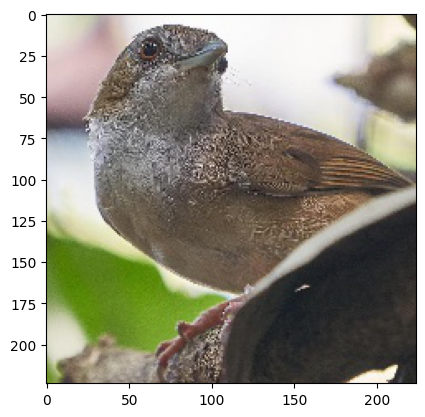

In [14]:
plt.imshow(plt.imread(PATH + data["filepaths"][0]))

In [16]:
data.rename(columns = {"filepaths":"filename", "labels":"category"}, inplace = True)

## Dividir entre train y test

In [17]:
train, test= train_test_split(data, test_size = 0.2, random_state=2)

In [18]:
train, val= train_test_split(train, test_size = 0.2, random_state=2)

In [19]:
train.shape

(57526, 5)

In [20]:
val.shape

(14382, 5)

In [21]:
test.shape

(17977, 5)

## Generación de nuevos datos

In [22]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 15,
    shear_range = 0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range = 0.1,
    height_shift_range = 0.1
)

train_generator = train_datagen.flow_from_dataframe(
    train,
    PATH,
    x_col = 'filename',
    y_col = 'category',
    target_size = (128, 128)
)

Found 57423 validated image filenames belonging to 524 classes.


/usr/local/lib/python3.10/dist-packages/keras/preprocessing/image.py:1137: UserWarning: Found 103 invalid image filename(s) in x_col="filename". These filename(s) will be ignored.
  warnings.warn(


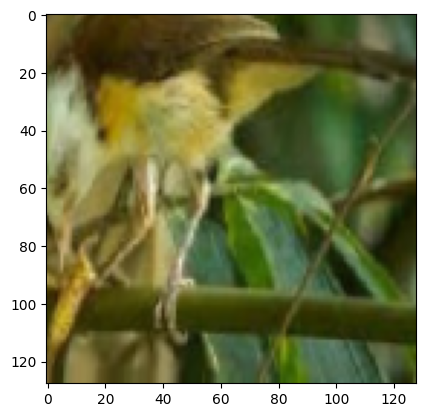

In [23]:
plt.imshow(train_generator[0][0][0])

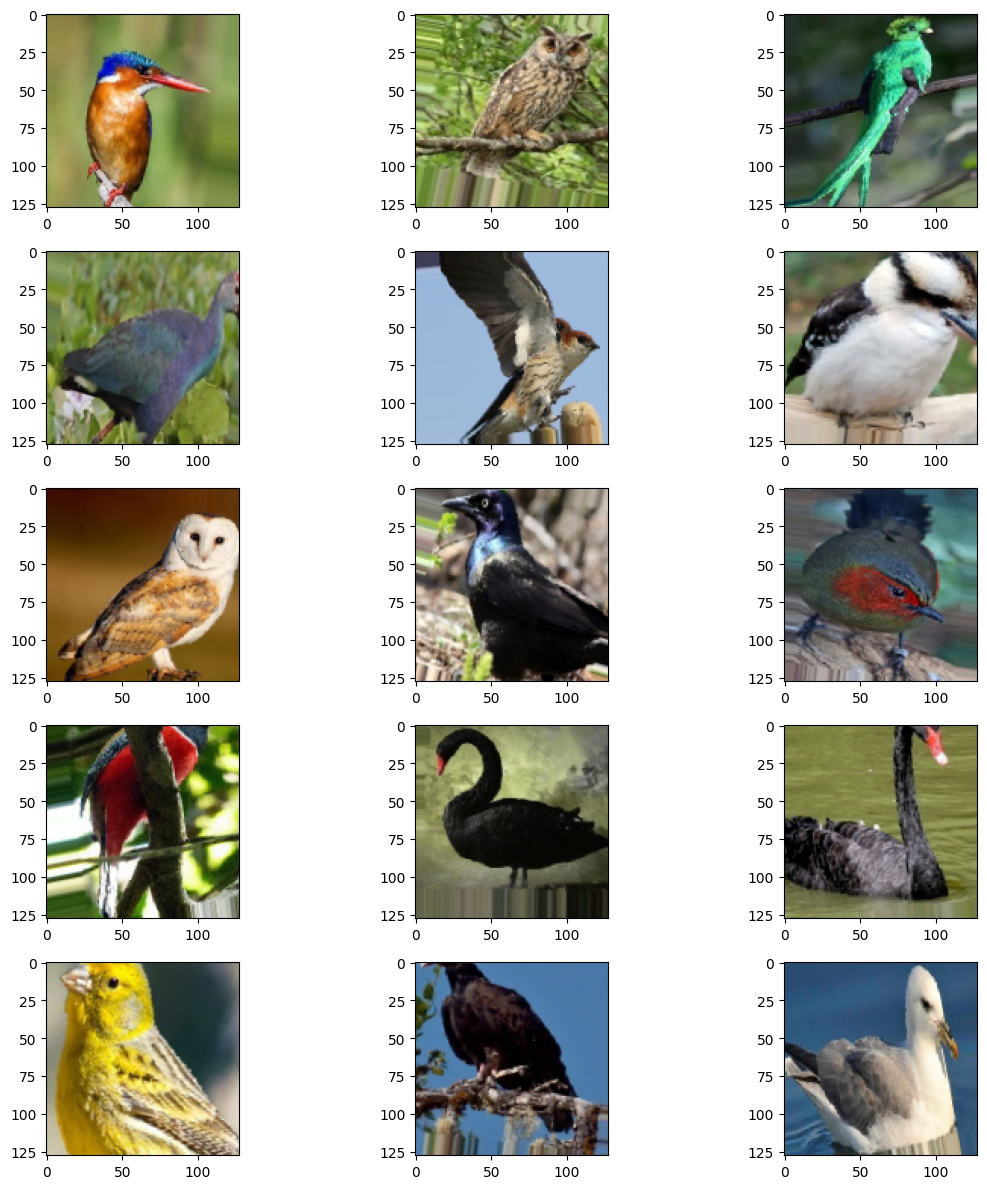

In [24]:
plt.figure(figsize=(12, 12))

for i in range(0, 15):
    plt.subplot(5, 3, i+1)
    for X_batch, Y_batch in train_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

In [25]:
val_datagen = ImageDataGenerator(rescale = 1./255,)

val_generator = train_datagen.flow_from_dataframe(
    train,
    PATH,
    x_col = 'filename',
    y_col = 'category',
    target_size = (128, 128))

Found 57423 validated image filenames belonging to 524 classes.


/usr/local/lib/python3.10/dist-packages/keras/preprocessing/image.py:1137: UserWarning: Found 103 invalid image filename(s) in x_col="filename". These filename(s) will be ignored.
  warnings.warn(


In [26]:
test_datagen = ImageDataGenerator(rescale = 1./255,)

test_generator = train_datagen.flow_from_dataframe(
    train,
    PATH,
    x_col = 'filename',
    y_col = 'category',
    target_size = (128, 128))

Found 57423 validated image filenames belonging to 524 classes.


/usr/local/lib/python3.10/dist-packages/keras/preprocessing/image.py:1137: UserWarning: Found 103 invalid image filename(s) in x_col="filename". These filename(s) will be ignored.
  warnings.warn(


## Creación del Modelo

In [38]:
layers = layers = [
    keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(128, 128, 3)),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    
    keras.layers.Conv2D(128, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
]

In [39]:
model = keras.Sequential(layers)

model.compile(optimizer = 'adam',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

In [40]:
data

,class id,filename,category,data set,scientific name
0,0.0,train/ABBOTTS BABBLER/001.jpg,ABBOTTS BABBLER,train,MALACOCINCLA ABBOTTI
1,0.0,train/ABBOTTS BABBLER/007.jpg,ABBOTTS BABBLER,train,MALACOCINCLA ABBOTTI
2,0.0,train/ABBOTTS BABBLER/008.jpg,ABBOTTS BABBLER,train,MALACOCINCLA ABBOTTI
3,0.0,train/ABBOTTS BABBLER/009.jpg,ABBOTTS BABBLER,train,MALACOCINCLA ABBOTTI
4,0.0,train/ABBOTTS BABBLER/002.jpg,ABBOTTS BABBLER,train,MALACOCINCLA ABBOTTI
...,...,...,...,...,...
89880,524.0,valid/BLACK BREASTED PUFFBIRD/3.jpg,BLACK BREASTED PUFFBIRD,valid,NOTHARCHUS PECTORALIS
89881,524.0,valid/BLACK BREASTED PUFFBIRD/4.jpg,BLACK BREASTED PUFFBIRD,valid,NOTHARCHUS PECTORALIS
89882,524.0,valid/BLACK BREASTED PUFFBIRD/1.jpg,BLACK BREASTED PUFFBIRD,valid,NOTHARCHUS PECTORALIS
89883,524.0,valid/BLACK BREASTED PUFFBIRD/2.jpg,BLACK BREASTED PUFFBIRD,valid,NOTHARCHUS PECTORALIS


In [41]:
history = model.fit(
    train_generator,
    batch_size=1024,
    epochs=2,
    validation_data = val_generator
)

1795/1795 [==============================] - 5329s 3s/step - loss: 0.0148 - accuracy: 0.9978 - val_loss: 0.0139 - val_accuracy: 0.9981
Epoch 2/2
1795/1795 [==============================] - 5341s 3s/step - loss: 0.0139 - accuracy: 0.9981 - val_loss: 0.0139 - val_accuracy: 0.9981


## Evaluación del modelo

In [45]:
model.evaluate(test_generator)

1795/1795 [==============================] - 1234s 687ms/step - loss: 0.0139 - accuracy: 0.9981


[0.013857688754796982, 0.9980751872062683]

## Guardamos el modelo

In [50]:
model.save("../models/model.h5")